In [40]:
import pandas as pd
import pickle as pk
from scipy import sparse as sp
from array import array
import numpy as np
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt

In [38]:
def fun(s):
    return re.sub(r'([\d]+)','',s).lower()
p_df = pd.read_csv('/Users/richard/Desktop/660D Web Analytics/Final_project/wynn_neg_reviews.csv')
p_df['0'].fillna('none', inplace=True)
doc_complete=p_df['0']

In [41]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

sw = stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [42]:
doc_complete=doc_complete.apply(remove_punctuation)
doc_complete2=doc_complete.apply(stopwords)
doc_complete3=doc_complete2.apply(stemming)

In [43]:
list1 = []
for eachline in doc_complete2:
#     print(eachline)
    list1.append(eachline)

In [44]:
newlist111 = []
for i in list1:
    i = i.split(" ")
#     i = i.split()
#     print(i)
    i = [item for item in (filter(lambda x: x.isalpha(),i))]
    #newlist111.append(list111(filter(lambda x : x.isalpha(), i)))
    newlist111.append(i)

In [45]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [46]:
docs = docs_preprocessor(newlist111)

In [47]:
from gensim.models import word2vec
import logging
import pandas as pd
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = word2vec.Word2Vec(docs, min_count=5, size=100, window=5, workers=4 )

2018-04-16 22:44:35,871 : INFO : collecting all words and their counts
2018-04-16 22:44:35,873 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-16 22:44:35,877 : INFO : collected 1668 word types from a corpus of 5761 raw words and 528 sentences
2018-04-16 22:44:35,879 : INFO : Loading a fresh vocabulary
2018-04-16 22:44:35,882 : INFO : min_count=5 retains 286 unique words (17% of original 1668, drops 1382)
2018-04-16 22:44:35,885 : INFO : min_count=5 leaves 3701 word corpus (64% of original 5761, drops 2060)
2018-04-16 22:44:35,888 : INFO : deleting the raw counts dictionary of 1668 items
2018-04-16 22:44:35,891 : INFO : sample=0.001 downsamples 122 most-common words
2018-04-16 22:44:35,893 : INFO : downsampling leaves estimated 2547 word corpus (68.8% of prior 3701)
2018-04-16 22:44:35,899 : INFO : estimated required memory for 286 words and 100 dimensions: 371800 bytes
2018-04-16 22:44:35,904 : INFO : resetting layer weights
2018-04-16 22:44:35,918 :

In [50]:
print("Top 20 words similar to word 'room'")
print(model.wv.most_similar('room', topn=20))

print("Top 20 words similar to word 'location'")
print(model.wv.most_similar('location', topn=20))

print("Top 20 words similar to word 'facility'")
print(model.wv.most_similar(positive=['facility'], negative=['great'], topn=20))

Top 20 words similar to word 'room'
[('night', 0.9127095937728882), ('didnt', 0.9016093611717224), ('hotel', 0.8936994671821594), ('staff', 0.8626961708068848), ('pool', 0.8610234260559082), ('long', 0.8578184843063354), ('time', 0.857124388217926), ('like', 0.853206992149353), ('even', 0.8517798185348511), ('come', 0.8502424955368042), ('wanted', 0.8444399237632751), ('check', 0.8383225202560425), ('service', 0.8379586935043335), ('club', 0.8376915454864502), ('back', 0.834669291973114), ('said', 0.8302338719367981), ('line', 0.8254300951957703), ('also', 0.8223788142204285), ('door', 0.8215863108634949), ('next', 0.8204774856567383)]
Top 20 words similar to word 'location'
[('tower', 0.44098901748657227), ('wynn', 0.41590070724487305), ('included', 0.4093199670314789), ('thing', 0.40732330083847046), ('think', 0.4018532633781433), ('reception', 0.4016647934913635), ('cleaning', 0.399595707654953), ('want', 0.39305049180984497), ('checkin', 0.3903832733631134), ('good', 0.387097716331

In [59]:
docs=docs[1:]

In [53]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
#matplotlib inline
import os.path

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [63]:
wordcloud_wynn_neg_reviews = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40,
                          random_state=42).generate(str(docs))

In [66]:
plt.imshow(wordcloud_wynn_neg_reviews)

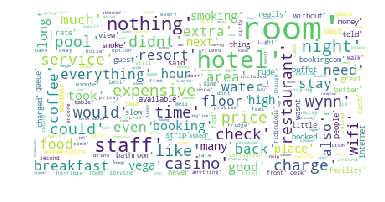

In [67]:
plt.axis('off')
plt.show()

In [69]:
df = pd.read_csv('/Users/richard/Desktop/660D Web Analytics/Final_project/Caesar_palace_neg_review.csv')
df['neg_review'].fillna('none', inplace=True)
doc_complete=df['neg_review']

In [71]:
doc_complete=doc_complete.apply(remove_punctuation)
doc_complete_Caesar_2=doc_complete.apply(stopwords)

In [72]:
list_Caesar = []
for eachline in doc_complete_Caesar_2:
#     print(eachline)
    list_Caesar.append(eachline)
    
list_Caesar_neg = []
for i in list_Caesar:
    i = i.split(" ")
#     i = i.split()
#     print(i)
    i = [item for item in (filter(lambda x: x.isalpha(),i))]
    #newlist111.append(list111(filter(lambda x : x.isalpha(), i)))
    list_Caesar_neg.append(i)

In [79]:
docs_Caesar = docs_preprocessor(list_Caesar_neg)

In [80]:
wordcloud_Caesar_neg_reviews = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40,
                          random_state=42).generate(str(docs_Caesar))

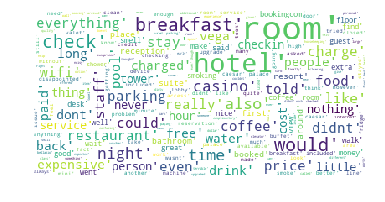

In [83]:
plt.imshow(wordcloud_Caesar_neg_reviews)
plt.axis('off')
plt.show()

In [84]:
from gensim.models import word2vec
import logging
import pandas as pd
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
model = word2vec.Word2Vec(docs_Caesar, min_count=5, size=100, window=5, workers=4 )

2018-04-16 23:10:12,026 : INFO : collecting all words and their counts
2018-04-16 23:10:12,030 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-16 23:10:12,036 : INFO : collected 2069 word types from a corpus of 8241 raw words and 384 sentences
2018-04-16 23:10:12,040 : INFO : Loading a fresh vocabulary
2018-04-16 23:10:12,046 : INFO : min_count=5 retains 387 unique words (18% of original 2069, drops 1682)
2018-04-16 23:10:12,049 : INFO : min_count=5 leaves 5668 word corpus (68% of original 8241, drops 2573)
2018-04-16 23:10:12,055 : INFO : deleting the raw counts dictionary of 2069 items
2018-04-16 23:10:12,059 : INFO : sample=0.001 downsamples 106 most-common words
2018-04-16 23:10:12,062 : INFO : downsampling leaves estimated 4162 word corpus (73.4% of prior 5668)
2018-04-16 23:10:12,066 : INFO : estimated required memory for 387 words and 100 dimensions: 503100 bytes
2018-04-16 23:10:12,070 : INFO : resetting layer weights
2018-04-16 23:10:12,079 :

In [93]:
print("Top 20 words similar to word 'room'")
print(model.wv.most_similar('location', topn=30))

Top 20 words similar to word 'room'
[('tower', 0.8950945734977722), ('think', 0.890818178653717), ('thing', 0.8906549215316772), ('reception', 0.8905179500579834), ('checkin', 0.8901638388633728), ('included', 0.8896493315696716), ('want', 0.8885706067085266), ('good', 0.8878256678581238), ('buffet', 0.8877976536750793), ('palace', 0.8877734541893005), ('bathroom', 0.8873854875564575), ('really', 0.8873825073242188), ('fact', 0.8873407244682312), ('smell', 0.8869026303291321), ('minute', 0.8857403993606567), ('line', 0.8856979012489319), ('look', 0.8855702877044678), ('would', 0.8854385018348694), ('staff', 0.8853643536567688), ('getting', 0.885127604007721), ('went', 0.885096549987793), ('clean', 0.8850831985473633), ('credit', 0.8850294351577759), ('dont', 0.8849513530731201), ('given', 0.8844529986381531), ('restaurant', 0.8844199776649475), ('breakfast', 0.8842793703079224), ('hotel', 0.8841022253036499), ('need', 0.883893609046936), ('asked', 0.8838517069816589)]
